## Task

Write a script which reads 'coin.jpg' as input and outputs a new image containing:

 - only the coins touching the boundary of the image
 - only the coins which overlap with each other. Count such coins.
 - only non-overlapping coins. Count such coins.


In [50]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import skimage.morphology as morph

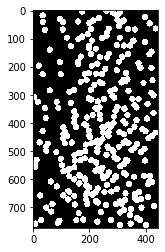

In [119]:
img = cv.imread("images/coins.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")

given, coin radius is ~9px

params:

In [120]:
h, w = img.shape[:2]
d = 18
r = d // 2

### count coins touching boundary

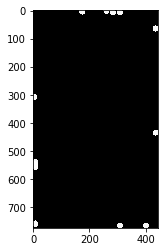

In [121]:
kernel = morph.disk(r)

mask = np.zeros((h - d, w - d))
masked = img.copy()

masked = cv.erode(masked, kernel)
masked[r:-r, r:-r] = mask
masked = cv.dilate(masked, kernel)

plt.imshow(masked, cmap="gray")

### count overlapping coins 

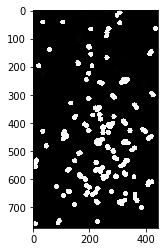

In [160]:
kernel = morph.disk(r)
eroded = cv.erode(img, kernel)
eroded = cv.erode(eroded, morph.disk(2))

overlapping = cv.dilate(eroded, morph.disk(r))

plt.imshow(overlapping, cmap="gray")

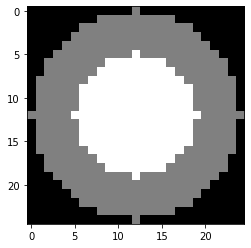

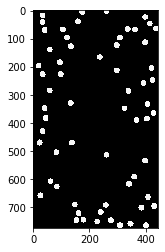

In [193]:
pad = 5

# being forgiving, enforcing a shorter radius
_r = r - 2

# 0s and 1s
coin_mask = morph.disk(_r)
# 0s and 1s
overlay = morph.disk(_r + pad)
# 0s, 1s and 2s
overlay[pad:-pad, pad:-pad] += coin_mask
# -1, 0, 1
kernel = overlay.astype("int") - 1

singles = cv.morphologyEx(img, cv.MORPH_HITMISS, kernel)
singles = cv.dilate(singles, morph.disk(r+1))

plt.imshow(kernel, cmap="gray")
plt.show()
plt.imshow(singles, cmap="gray")

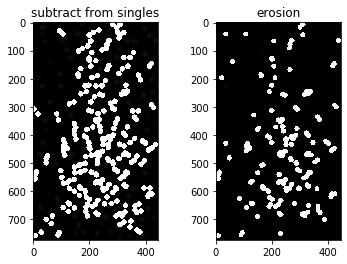

In [199]:
overlapping2 = img - singles
overlapping2 = cv.erode(overlapping2, np.ones((3,3)))

fig = plt.figure()
ax = fig.add_subplot(121)
plt.title("subtract from singles")
ax.imshow(overlapping2, cmap="gray")

ax = fig.add_subplot(122)
plt.title("erosion")
ax.imshow(overlapping, cmap="gray")